# Imports

In [2]:
import optuna
from optuna.samplers import TPESampler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import pandas as pd

# Train test split

In [3]:
# Load the prepared data
data = pd.read_csv('/kaggle/input/hyperparameter-search-space/prepared_features1.csv')

# Separate features and labels
X = data.drop(columns=['disorder'])
y = data['disorder'] 

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ML models

In [4]:
# Assuming you already have X and y
X = data.drop(columns=['disorder'])
y = data['disorder']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models without class weights
models = [
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('SVM', SVC()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('ANN', MLPClassifier()),
    ('SGD Classifier', SGDClassifier()),
    ('Label Spreading', LabelSpreading()),
    ('Label Propagation', LabelPropagation()),
    ('XGBClassifier', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ('LGBMClassifier', LGBMClassifier()),
    ('ExtraTreesClassifier', ExtraTreesClassifier())
]

# Train and evaluate each model
for name, model in models:
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")

Training Logistic Regression...


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.70703125
Training KNN...
KNN Accuracy: 0.708984375
Training Decision Tree...
Decision Tree Accuracy: 0.658203125
Training Naive Bayes...
Naive Bayes Accuracy: 0.29296875
Training SVM...
SVM Accuracy: 0.7607421875
Training Random Forest...
Random Forest Accuracy: 0.7861328125
Training Gradient Boosting...
Gradient Boosting Accuracy: 0.7216796875
Training ANN...


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ANN Accuracy: 0.7822265625
Training SGD Classifier...
SGD Classifier Accuracy: 0.6796875
Training Label Spreading...


/opt/conda/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


Label Spreading Accuracy: 0.826171875
Training Label Propagation...


/opt/conda/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


Label Propagation Accuracy: 0.826171875
Training XGBClassifier...
XGBClassifier Accuracy: 0.8154296875
Training LGBMClassifier...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003753 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
LGBMClassifier Accuracy: 0.8134765625
Training ExtraTreesClassifier...
ExtraTreesClassifier Accuracy: 0.7939453125


# hyperparameter search optimization

# logistic regression

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import optuna
from sklearn.linear_model import LogisticRegression

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    C = trial.suggest_loguniform('C', 0.001, 1000)
    solver_penalty = trial.suggest_categorical(
        'solver_penalty', [
            ('newton-cg', 'l2'),
            ('newton-cg', None),
            ('lbfgs', 'l2'),
            ('lbfgs', None),
            ('liblinear', 'l1'),
            ('liblinear', 'l2'),
            ('sag', 'l2'),
            ('sag', None),
            ('saga', 'elasticnet'),
            ('saga', 'l1'),
            ('saga', 'l2'),
            ('saga', None)
        ]
    )
    
    solver, penalty = solver_penalty
    if penalty == 'elasticnet':
        l1_ratio = trial.suggest_uniform('l1_ratio', 0, 1)
        model = LogisticRegression(C=C, solver=solver, penalty=penalty, l1_ratio=l1_ratio, random_state=42, max_iter=1000)
    else:
        model = LogisticRegression(C=C, solver=solver, penalty=penalty, random_state=42, max_iter=1000)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Logistic Regression:")
print(f"  Best Parameters: {study.best_params}")
print(f"  Best Accuracy: {study.best_value}")

# Train the model with the best hyperparameters
best_params = study.best_params
solver, penalty = best_params.pop('solver_penalty')
if penalty == 'elasticnet':
    best_params['penalty'] = penalty
    best_params['solver'] = solver
    model = LogisticRegression(**best_params, random_state=42, max_iter=1000)
else:
    best_params['penalty'] = penalty
    best_params['solver'] = solver
    best_params.pop('l1_ratio', None)
    model = LogisticRegression(**best_params, random_state=42, max_iter=1000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")


[I 2024-05-22 09:55:50,935] A new study created in memory with name: no-name-cfcee4ee-09cb-4daf-9e31-f3d8314ab187
/tmp/ipykernel_34/2428189306.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.001, 1000)
/opt/conda/lib/python3.10/site-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('newton-cg', 'l2') which is of type tuple.
  warnings.warn(message)
/opt/conda/lib/python3.10/site-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('newton-cg', None) which is of type tuple.
  warnings.warn(message)
/opt/conda/lib/python3.10/site-packages/

Logistic Regression:
  Best Parameters: {'C': 4.96309498989267, 'solver_penalty': ('newton-cg', 'l2')}
  Best Accuracy: 0.7080078125
Test Accuracy: 0.7080078125


# KNN

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import optuna
from sklearn.neighbors import KNeighborsClassifier

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 50)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])
    p = trial.suggest_int('p', 1, 5)
    
    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, p=p)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("K-Nearest Neighbors:")
print(f"  Best Parameters: {study.best_params}")
print(f"  Best Accuracy: {study.best_value}")

# Train the model with the best hyperparameters
best_params = study.best_params
model = KNeighborsClassifier(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

[I 2024-05-22 10:01:15,670] A new study created in memory with name: no-name-fab02e77-d317-4e9a-82ef-ba7e6fffa338
[I 2024-05-22 10:01:16,582] Trial 0 finished with value: 0.68359375 and parameters: {'n_neighbors': 29, 'weights': 'distance', 'algorithm': 'kd_tree', 'p': 1}. Best is trial 0 with value: 0.68359375.
[I 2024-05-22 10:01:24,249] Trial 1 finished with value: 0.6708984375 and parameters: {'n_neighbors': 23, 'weights': 'distance', 'algorithm': 'kd_tree', 'p': 3}. Best is trial 0 with value: 0.68359375.
[I 2024-05-22 10:01:24,870] Trial 2 finished with value: 0.7041015625 and parameters: {'n_neighbors': 10, 'weights': 'uniform', 'algorithm': 'ball_tree', 'p': 1}. Best is trial 2 with value: 0.7041015625.
[I 2024-05-22 10:01:25,741] Trial 3 finished with value: 0.7490234375 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'algorithm': 'kd_tree', 'p': 1}. Best is trial 3 with value: 0.7490234375.
[I 2024-05-22 10:01:32,439] Trial 4 finished with value: 0.6650390625 and pa

K-Nearest Neighbors:
  Best Parameters: {'n_neighbors': 1, 'weights': 'distance', 'algorithm': 'kd_tree', 'p': 1}
  Best Accuracy: 0.8955078125
Test Accuracy: 0.8955078125


# Decision tree

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import optuna
from sklearn.tree import DecisionTreeClassifier

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
    splitter = trial.suggest_categorical('splitter', ['best', 'random'])
    max_depth = trial.suggest_int('max_depth', 1, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    model = DecisionTreeClassifier(
        criterion=criterion,
        splitter=splitter,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Decision Tree:")
print(f"  Best Parameters: {study.best_params}")
print(f"  Best Accuracy: {study.best_value}")

# Train the model with the best hyperparameters
best_params = study.best_params
model = DecisionTreeClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")


[I 2024-05-22 10:02:54,550] A new study created in memory with name: no-name-4f5245a7-35af-4b73-aa7b-21a308c0c8a5
[I 2024-05-22 10:02:54,565] Trial 0 finished with value: 0.62890625 and parameters: {'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 19, 'max_features': 'log2'}. Best is trial 0 with value: 0.62890625.
[I 2024-05-22 10:02:54,596] Trial 1 finished with value: 0.6611328125 and parameters: {'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': None}. Best is trial 1 with value: 0.6611328125.
[I 2024-05-22 10:02:54,621] Trial 2 finished with value: 0.6259765625 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 2, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.6611328125.
[I 2024-05-22 10:02:54,633] Trial 3 finished with value: 0.62890625 and parameters: {'criterion': 'gi

Decision Tree:
  Best Parameters: {'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': None}
  Best Accuracy: 0.6845703125
Test Accuracy: 0.6845703125


# SVC

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import optuna
from sklearn.svm import SVC

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    C = trial.suggest_loguniform('C', 0.001, 1000)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    
    model = SVC(C=C, kernel=kernel, gamma=gamma, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Support Vector Classifier (SVC):")
print(f"  Best Parameters: {study.best_params}")
print(f"  Best Accuracy: {study.best_value}")

# Train the model with the best hyperparameters
best_params = study.best_params
model = SVC(**best_params, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")


[I 2024-05-22 10:02:58,148] A new study created in memory with name: no-name-d4e707af-1c04-4427-8952-f826f18d0838
/tmp/ipykernel_34/1362967554.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.001, 1000)
[I 2024-05-22 10:02:59,343] Trial 0 finished with value: 0.576171875 and parameters: {'C': 4.023616399816665, 'kernel': 'sigmoid', 'gamma': 'auto'}. Best is trial 0 with value: 0.576171875.
/tmp/ipykernel_34/1362967554.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.001, 1000)
[I 2024-05-22 10:03:01,247] Trial 1 finished with value: 0.8291015625 and parameters: {'C': 120.43858430232986, 'ker

Support Vector Classifier (SVC):
  Best Parameters: {'C': 10.72209576024274, 'kernel': 'rbf', 'gamma': 'scale'}
  Best Accuracy: 0.849609375
Test Accuracy: 0.849609375


# Random forest

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import optuna
from sklearn.ensemble import RandomForestClassifier

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 300)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 1, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    model = RandomForestClassifier(
        n_estimators=n_estimators, 
        criterion=criterion, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf, 
        max_features=max_features, 
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Random Forest:")
print(f"  Best Parameters: {study.best_params}")
print(f"  Best Accuracy: {study.best_value}")

# Train the model with the best hyperparameters
best_params = study.best_params
model = RandomForestClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")


[I 2024-05-22 10:22:03,503] A new study created in memory with name: no-name-a8991976-12a1-49ed-b769-048e61211041
[I 2024-05-22 10:22:05,535] Trial 0 finished with value: 0.703125 and parameters: {'n_estimators': 103, 'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 18, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.703125.
[I 2024-05-22 10:22:06,758] Trial 1 finished with value: 0.724609375 and parameters: {'n_estimators': 48, 'criterion': 'gini', 'max_depth': 33, 'min_samples_split': 13, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.724609375.
[I 2024-05-22 10:23:12,856] Trial 2 finished with value: 0.765625 and parameters: {'n_estimators': 235, 'criterion': 'gini', 'max_depth': 31, 'min_samples_split': 20, 'min_samples_leaf': 5, 'max_features': None}. Best is trial 2 with value: 0.765625.
[I 2024-05-22 10:23:16,668] Trial 3 finished with value: 0.6923828125 and parameters: {'n_estimators': 165, 'criterion': 'en

Random Forest:
  Best Parameters: {'n_estimators': 258, 'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None}
  Best Accuracy: 0.791015625
Test Accuracy: 0.791015625


# Gradient boosting

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import optuna
from sklearn.ensemble import GradientBoostingClassifier

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 300)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
    max_depth = trial.suggest_int('max_depth', 1, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    model = GradientBoostingClassifier(
        n_estimators=n_estimators, 
        learning_rate=learning_rate, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf, 
        max_features=max_features, 
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Gradient Boosting Classifier:")
print(f"  Best Parameters: {study.best_params}")
print(f"  Best Accuracy: {study.best_value}")

# Train the model with the best hyperparameters
best_params = study.best_params
model = GradientBoostingClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")


[I 2024-05-22 11:05:09,771] A new study created in memory with name: no-name-25ceb13a-a5c7-40e0-9dfd-6cf3cacd6098
/tmp/ipykernel_34/353082775.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-05-22 11:05:20,353] Trial 0 finished with value: 0.6259765625 and parameters: {'n_estimators': 42, 'learning_rate': 0.004789109250740608, 'max_depth': 48, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6259765625.
/tmp/ipykernel_34/353082775.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate',

Gradient Boosting Classifier:
  Best Parameters: {'n_estimators': 286, 'learning_rate': 0.15998117711314025, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': None}
  Best Accuracy: 0.8427734375
Test Accuracy: 0.8427734375


# ANN

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import optuna
from sklearn.neural_network import MLPClassifier

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (50, 50), (100, 50)])
    activation = trial.suggest_categorical('activation', ['identity', 'logistic', 'tanh', 'relu'])
    solver = trial.suggest_categorical('solver', ['lbfgs', 'sgd', 'adam'])
    alpha = trial.suggest_loguniform('alpha', 0.0001, 1)
    learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'invscaling', 'adaptive'])
    learning_rate_init = trial.suggest_loguniform('learning_rate_init', 0.0001, 0.1)
    
    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, alpha=alpha, learning_rate=learning_rate, learning_rate_init=learning_rate_init, max_iter=2000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Multi-Layer Perceptron (MLP):")
print(f"  Best Parameters: {study.best_params}")
print(f"  Best Accuracy: {study.best_value}")

# Train the model with the best hyperparameters
best_params = study.best_params
model = MLPClassifier(**best_params, random_state=42, max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")


[I 2024-05-22 12:16:23,908] A new study created in memory with name: no-name-a0ea50b0-d927-4357-bf32-1e57670a7164
/opt/conda/lib/python3.10/site-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50,) which is of type tuple.
  warnings.warn(message)
/opt/conda/lib/python3.10/site-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/opt/conda/lib/python3.10/site-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (50, 50) which is of type tuple.
  warnings.warn(message)
/opt/conda/lib/python3.10/site-packages/optuna/distributions.py:524: UserWarning: Choices 

Multi-Layer Perceptron (MLP):
  Best Parameters: {'hidden_layer_sizes': (100,), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.921664156291127, 'learning_rate': 'constant', 'learning_rate_init': 0.000124517058281786}
  Best Accuracy: 0.859375
Test Accuracy: 0.859375


# SGDC

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import optuna
from sklearn.linear_model import SGDClassifier

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    alpha = trial.suggest_loguniform('alpha', 0.0001, 1)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet'])
    if penalty == 'elasticnet':
        l1_ratio = trial.suggest_uniform('l1_ratio', 0, 1)
        model = SGDClassifier(alpha=alpha, penalty=penalty, l1_ratio=l1_ratio, random_state=42)
    else:
        model = SGDClassifier(alpha=alpha, penalty=penalty, random_state=42)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Stochastic Gradient Descent (SGD) Classifier:")
print(f"  Best Parameters: {study.best_params}")
print(f"  Best Accuracy: {study.best_value}")

# Train the model with the best hyperparameters
best_params = study.best_params
if 'l1_ratio' in best_params:
    model = SGDClassifier(**best_params, random_state=42)
else:
    best_params.pop('l1_ratio', None)
    model = SGDClassifier(**best_params, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")


[I 2024-05-22 12:28:35,472] A new study created in memory with name: no-name-0e5f9e1c-9843-464c-aaab-c3ecdf40b70b
/tmp/ipykernel_34/2955687417.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 0.0001, 1)
/tmp/ipykernel_34/2955687417.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  l1_ratio = trial.suggest_uniform('l1_ratio', 0, 1)
[I 2024-05-22 12:28:36,063] Trial 0 finished with value: 0.6943359375 and parameters: {'alpha': 0.0024296985852698453, 'penalty': 'elasticnet', 'l1_ratio': 0.40601411213913075}. Best is trial 0 with value: 0.6943359375.
/tmp/ipykernel_34/2955687417.py:10: FutureWarning: suggest_loguniform has been deprecated in v

Stochastic Gradient Descent (SGD) Classifier:
  Best Parameters: {'alpha': 0.0011784377340468284, 'penalty': 'elasticnet', 'l1_ratio': 0.24215717320359165}
  Best Accuracy: 0.701171875
Test Accuracy: 0.701171875


# XGBOOST

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import optuna
import xgboost as xgb

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    param = {
        'verbosity': 0,
        'objective': 'multi:softmax',  # Change to 'multi:softmax' for multiclass classification
        'num_class': len(set(y)),  # Specify the number of classes
        'booster': 'gbtree',
        'eval_metric': 'mlogloss',  # Change the evaluation metric to 'mlogloss' for multiclass
        'max_depth': trial.suggest_int('max_depth', 1, 20),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
    }
    
    model = xgb.XGBClassifier(**param, use_label_encoder=False)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("XGBoost:")
print(f"  Best Parameters: {study.best_params}")
print(f"  Best Accuracy: {study.best_value}")

# Train the model with the best hyperparameters
best_params = study.best_params
model = xgb.XGBClassifier(**best_params, use_label_encoder=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")


[I 2024-05-22 12:29:02,736] A new study created in memory with name: no-name-5d156e7a-7684-4b21-82a2-e0e33bcb44a3
/tmp/ipykernel_34/536003610.py:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/536003610.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
/tmp/ipykernel_34/536003610.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5,

XGBoost:
  Best Parameters: {'max_depth': 16, 'learning_rate': 0.13733022086521005, 'n_estimators': 260, 'gamma': 9.489637395914916e-08, 'min_child_weight': 1, 'subsample': 0.8440460069647218, 'colsample_bytree': 0.9082764938678284, 'reg_alpha': 1.8290105319966557e-05, 'reg_lambda': 0.0001651772421846983}
  Best Accuracy: 0.8271484375
Test Accuracy: 0.8271484375


# LightGBM

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import optuna
import lightgbm as lgb

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    param = {
        'objective': 'multiclass',
        'num_class': len(set(y)),  # Number of classes
        'metric': 'multi_logloss',
        'boosting_type': 'gbdt',
        'max_depth': trial.suggest_int('max_depth', 1, 20),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
    }
    
    model = lgb.LGBMClassifier(**param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("LightGBM:")
print(f"  Best Parameters: {study.best_params}")
print(f"  Best Accuracy: {study.best_value}")

# Train the model with the best hyperparameters
best_params = study.best_params
model = lgb.LGBMClassifier(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")


[I 2024-05-22 12:37:54,557] A new study created in memory with name: no-name-3549f72f-8caa-4aa2-9d98-3f95f4cf6523


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003732 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003514 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-22 12:38:03,631] Trial 1 finished with value: 0.83203125 and parameters: {'max_depth': 7, 'learning_rate': 0.17875693627629818, 'n_estimators': 147, 'min_child_weight': 0.0127476000039783, 'subsample': 0.8904147987690987, 'colsample_bytree': 0.7694781030194808, 'reg_alpha': 0.0029701530332434767, 'reg_lambda': 0.00022156275508094015}. Best is trial 1 with value: 0.83203125.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004879 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No furthe

/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-22 12:38:11,832] Trial 2 finished with value: 0.7548828125 and parameters: {'max_depth': 7, 'learning_rate': 0.010293492241303756, 'n_estimators': 293, 'min_child_weight': 0.006306365100296633, 'subsample': 0.8525249816884983, 'colsample_bytree': 0.9561783382780138, 'reg_alpha': 9.240537666791279e-06, 'reg_lambda': 0.08552409548524126}. Best is trial 1 with value: 0.83203125.
/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_chi

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-05-22 12:38:13,933] Trial 3 finished with value: 0.744140625 and parameters: {'max_depth': 5, 'learning_rate': 0.02379317790811492, 'n_estimators': 116, 'min_child_weight': 0.6574677681506398, 'subsample': 0.9195591871987543, 'colsample_bytree': 0.8311528926086142, 'reg_alpha': 0.02793439990880139, 'reg_lambda': 4.2894876858542827e-05}. Best is trial 1 with value: 0.83203125.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM

/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002827 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171


/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171


/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-22 12:38:26,190] Trial 6 finished with value: 0.8212890625 and parameters: {'max_depth': 12, 'learning_rate': 0.28747588058069723, 'n_estimators': 209, 'min_child_weight': 0.8641038690081531, 'subsample': 0.773829669759347, 'colsample_bytree': 0.6713543014862866, 'reg_alpha': 0.0012996898049869806, 'reg_lambda': 0.0006850848436271753}. Best is trial 1 with value: 0.83203125.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-22 12:38:27,213] Trial 7 finished with value: 0.7587890625 and parameters: {'max_depth': 3, 'learning_rate': 0.2290937064149862, 'n_estimators': 132, 'min_child_weight': 0.05616067552215109, 'subsample': 0.8308940983468931, 'colsample_bytree': 0.8339106890914574, 'reg_alpha': 9.012441374741116e-07, 'reg_lambda': 3.036366328901977e-08}. Best is trial 1 with value: 0.83203125.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171


/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-22 12:38:30,897] Trial 9 finished with value: 0.810546875 and parameters: {'max_depth': 20, 'learning_rate': 0.3241405492027536, 'n_estimators': 77, 'min_child_weight': 0.0501896417781457, 'subsample': 0.5463474151886689, 'colsample_bytree': 0.8686518942376209, 'reg_alpha': 0.005186394281110922, 'reg_lambda': 0.8635588460160363}. Best is trial 1 with value: 0.83203125.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002900 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171


[I 2024-05-22 12:38:31,387] Trial 10 finished with value: 0.703125 and parameters: {'max_depth': 1, 'learning_rate': 0.12591066385641925, 'n_estimators': 161, 'min_child_weight': 9.375913770551106, 'subsample': 0.9592961717162949, 'colsample_bytree': 0.5001629542751427, 'reg_alpha': 2.0371942511359746e-08, 'reg_lambda': 2.179892296446151e-06}. Best is trial 1 with value: 0.83203125.
/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_w

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003142 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-05-22 12:38:35,964] Trial 11 finished with value: 0.8359375 and parameters: {'max_depth': 12, 'learning_rate': 0.1576162797552894, 'n_estimators': 196, 'min_child_weight': 0.01319104127702058, 'subsample': 0.6711578868421607, 'colsample_bytree': 0.6409631534766629, 'reg_alpha': 0.0010734973831292508, 'reg_lambda': 0.0009129065295349084}. Best is trial 11 with value: 0.8359375.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-22 12:38:39,834] Trial 12 finished with value: 0.8203125 and parameters: {'max_depth': 11, 'learning_rate': 0.11909252094913754, 'n_estimators': 179, 'min_child_weight': 0.010596752718810533, 'subsample': 0.6612662509623758, 'colsample_bytree': 0.6192533043059736, 'reg_alpha': 0.0004889877487758498, 'reg_lambda': 0.003979664847102478}. Best is trial 11 with value: 0.8359375.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-05-22 12:38:42,486] Trial 13 finished with value: 0.810546875 and parameters: {'max_depth': 8, 'learning_rate': 0.13360496231787128, 'n_estimators': 167, 'min_child_weight': 0.012111328033560973, 'subsample': 0.6684264647401326, 'colsample_bytree': 0.6179403933934136, 'reg_alpha': 0.9672079785229284, 'reg_lambda': 0.0006308139922791265}. Best is trial 11 with value: 0.8359375.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171


/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-22 12:38:47,117] Trial 14 finished with value: 0.8173828125 and parameters: {'max_depth': 13, 'learning_rate': 0.4619202363648461, 'n_estimators': 216, 'min_child_weight': 0.0018780763881624675, 'subsample': 0.6716138929824638, 'colsample_bytree': 0.745934996530391, 'reg_alpha': 0.00027763350028184086, 'reg_lambda': 0.03132588502215591}. Best is trial 11 with value: 0.8359375.
/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_ch

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-05-22 12:38:50,467] Trial 15 finished with value: 0.7822265625 and parameters: {'max_depth': 6, 'learning_rate': 0.06092036910407679, 'n_estimators': 147, 'min_child_weight': 0.022406196373573436, 'subsample': 0.8809750692356457, 'colsample_bytree': 0.9664012756991942, 'reg_alpha': 0.007093785729832138, 'reg_lambda': 7.106893537618604e-06}. Best is trial 11 with value: 0.8359375.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-05-22 12:38:53,867] Trial 16 finished with value: 0.8232421875 and parameters: {'max_depth': 10, 'learning_rate': 0.17908050599113415, 'n_estimators': 186, 'min_child_weight': 0.0035018832223189444, 'subsample': 0.9744071084802923, 'colsample_bytree': 0.6825063571003489, 'reg_alpha': 0.15260012826020214, 'reg_lambda': 0.0009234390005547745}. Best is trial 11 with value: 0.8359375.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171


/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-22 12:38:59,346] Trial 17 finished with value: 0.828125 and parameters: {'max_depth': 14, 'learning_rate': 0.08592154427445899, 'n_estimators': 266, 'min_child_weight': 0.0934322921139218, 'subsample': 0.6170131187163352, 'colsample_bytree': 0.5998406291316116, 'reg_alpha': 7.887857826049937e-05, 'reg_lambda': 4.7354452617415034e-07}. Best is trial 11 with value: 0.8359375.
/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003337 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171


[I 2024-05-22 12:39:02,294] Trial 18 finished with value: 0.765625 and parameters: {'max_depth': 17, 'learning_rate': 0.0415190142655003, 'n_estimators': 90, 'min_child_weight': 0.027307783650724397, 'subsample': 0.7087125096641502, 'colsample_bytree': 0.8950459123443549, 'reg_alpha': 0.0035405945512925075, 'reg_lambda': 0.00012365582817353205}. Best is trial 11 with value: 0.8359375.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-22 12:39:04,398] Trial 19 finished with value: 0.8134765625 and parameters: {'max_depth': 4, 'learning_rate': 0.4785957060836844, 'n_estimators': 191, 'min_child_weight': 0.0036840455375850836, 'subsample': 0.8976088502368975, 'colsample_bytree': 0.7886147220871844, 'reg_alpha': 1.1209912312422984e-07, 'reg_lambda': 0.027759182073379414}. Best is trial 11 with value: 0.8359375.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[I 2024-05-22 12:39:10,325] Trial 20 finished with value: 0.8310546875 and parameters: {'max_depth': 10, 'learning_rate': 0.08717784502749247, 'n_estimators': 243, 'min_child_weight': 0.24041141162475793, 'subsample': 0.7147793066857178, 'colsample_bytree': 0.7006492280861292, 'reg_alpha': 0.030728394414706164, 'reg_lambda': 2.0676296868412983e-05}. Best is trial 11 with value: 0.8359375.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-05-22 12:39:15,785] Trial 21 finished with value: 0.830078125 and parameters: {'max_depth': 10, 'learning_rate': 0.0909019712443656, 'n_estimators': 241, 'min_child_weight': 0.1408665452219682, 'subsample': 0.6135294745679946, 'colsample_bytree': 0.7094239029971462, 'reg_alpha': 0.02354360887623101, 'reg_lambda': 2.5938705612515023e-05}. Best is trial 11 with value: 0.8359375.
/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-05-22 12:39:19,419] Trial 22 finished with value: 0.81640625 and parameters: {'max_depth': 8, 'learning_rate': 0.16171177092925387, 'n_estimators': 281, 'min_child_weight': 2.175989112713424, 'subsample': 0.7122482520432151, 'colsample_bytree': 0.6444220035228853, 'reg_alpha': 0.00011585937975395532, 'reg_lambda': 0.000197307376421055}. Best is trial 11 with value: 0.8359375.
/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002791 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-05-22 12:39:21,438] Trial 23 finished with value: 0.806640625 and parameters: {'max_depth': 12, 'learning_rate': 0.21486544879768657, 'n_estimators': 247, 'min_child_weight': 0.14015225284464178, 'subsample': 0.7192799219962775, 'colsample_bytree': 0.5491786113345319, 'reg_alpha': 0.952381292036561, 'reg_lambda': 0.002798427203633631}. Best is trial 11 with value: 0.8359375.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [W

/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-05-22 12:39:25,604] Trial 24 finished with value: 0.8173828125 and parameters: {'max_depth': 7, 'learning_rate': 0.08757284414254492, 'n_estimators': 204, 'min_child_weight': 0.01994182216773823, 'subsample': 0.6151210731414561, 'colsample_bytree': 0.724582256648661, 'reg_alpha': 0.0011407159566629256, 'reg_lambda': 1.5105358045418077e-05}. Best is trial 11 with value: 0.8359375.
/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_ch

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-05-22 12:39:28,458] Trial 25 finished with value: 0.82421875 and parameters: {'max_depth': 11, 'learning_rate': 0.33110076377571346, 'n_estimators': 146, 'min_child_weight': 0.26137542841074474, 'subsample': 0.8105207599289794, 'colsample_bytree': 0.7988392772946534, 'reg_alpha': 0.021152988865033546, 'reg_lambda': 7.383809907582992e-07}. Best is trial 11 with value: 0.8359375.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[I 2024-05-22 12:39:33,769] Trial 26 finished with value: 0.7998046875 and parameters: {'max_depth': 9, 'learning_rate': 0.046454233891045964, 'n_estimators': 230, 'min_child_weight': 0.03756406427827067, 'subsample': 0.7756401497635118, 'colsample_bytree': 0.656463480891486, 'reg_alpha': 0.09236246104843177, 'reg_lambda': 0.0002456441439419458}. Best is trial 11 with value: 0.8359375.
/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_chil

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-05-22 12:39:39,609] Trial 27 finished with value: 0.8330078125 and parameters: {'max_depth': 13, 'learning_rate': 0.11905311814621772, 'n_estimators': 272, 'min_child_weight': 0.008823893258855093, 'subsample': 0.74268497618643, 'colsample_bytree': 0.5704187544641773, 'reg_alpha': 0.0019385237955447936, 'reg_lambda': 0.01564967476070209}. Best is trial 11 with value: 0.8359375.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171


/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-22 12:39:45,095] Trial 28 finished with value: 0.8466796875 and parameters: {'max_depth': 17, 'learning_rate': 0.16372162316406566, 'n_estimators': 269, 'min_child_weight': 0.0078064332723734595, 'subsample': 0.9359777558440343, 'colsample_bytree': 0.5677440959756073, 'reg_alpha': 0.0009379704696096545, 'reg_lambda': 0.2266760924262304}. Best is trial 28 with value: 0.8466796875.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002734 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171


/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002593 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171


/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-22 12:39:56,127] Trial 30 finished with value: 0.828125 and parameters: {'max_depth': 15, 'learning_rate': 0.24334554608219824, 'n_estimators': 295, 'min_child_weight': 0.0020465978612330764, 'subsample': 0.9419777602219946, 'colsample_bytree': 0.5146411010963406, 'reg_alpha': 1.714697726446621e-06, 'reg_lambda': 0.1341539334848758}. Best is trial 28 with value: 0.8466796875.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002931 seconds.
You can set `force_col_wise=true` to remove the overhead.


/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[I 2024-05-22 12:40:01,346] Trial 31 finished with value: 0.833984375 and parameters: {'max_depth': 13, 'learning_rate': 0.16474980523414728, 'n_estimators': 265, 'min_child_weight': 0.009398818596655117, 'subsample': 0.9923498131214517, 'colsample_bytree': 0.5868412139857329, 'reg_alpha': 0.0012581571134306917, 'reg_lambda': 0.014397769319847323}. Best is trial 28 with value: 0.8466796875.
/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002716 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-05-22 12:40:06,584] Trial 32 finished with value: 0.8330078125 and parameters: {'max_depth': 13, 'learning_rate': 0.15942908938071995, 'n_estimators': 266, 'min_child_weight': 0.007782958232443416, 'subsample': 0.9971921985255641, 'colsample_bytree': 0.5837561230496348, 'reg_alpha': 0.0007201679843390807, 'reg_lambda': 0.014189286005045699}. Best is trial 28 with value: 0.8466796875.
/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('mi

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002802 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-05-22 12:40:12,195] Trial 33 finished with value: 0.8359375 and parameters: {'max_depth': 16, 'learning_rate': 0.17384898393464193, 'n_estimators': 282, 'min_child_weight': 0.01428149666770345, 'subsample': 0.9931324261416513, 'colsample_bytree': 0.5365480204528549, 'reg_alpha': 0.0018961262872801707, 'reg_lambda': 0.1759117024145147}. Best is trial 28 with value: 0.8466796875.
/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_chil

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002661 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-05-22 12:40:17,659] Trial 34 finished with value: 0.8349609375 and parameters: {'max_depth': 17, 'learning_rate': 0.1886472127405488, 'n_estimators': 297, 'min_child_weight': 0.01598698055920502, 'subsample': 0.9917261940297669, 'colsample_bytree': 0.5361805584362868, 'reg_alpha': 0.0002229570798646488, 'reg_lambda': 0.23435191575097458}. Best is trial 28 with value: 0.8466796875.
/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_c

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-05-22 12:40:22,909] Trial 35 finished with value: 0.8369140625 and parameters: {'max_depth': 17, 'learning_rate': 0.21342929773948868, 'n_estimators': 298, 'min_child_weight': 0.018774708777673278, 'subsample': 0.9266914822580943, 'colsample_bytree': 0.5312955494863979, 'reg_alpha': 0.00027687717949724896, 'reg_lambda': 0.1847052329320112}. Best is trial 28 with value: 0.8466796875.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002756 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171


/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-22 12:40:27,539] Trial 36 finished with value: 0.82421875 and parameters: {'max_depth': 16, 'learning_rate': 0.3926053086165594, 'n_estimators': 284, 'min_child_weight': 0.005176263580468882, 'subsample': 0.9395105370822479, 'colsample_bytree': 0.5277287565519307, 'reg_alpha': 3.5191702001738236e-05, 'reg_lambda': 0.08955144767112272}. Best is trial 28 with value: 0.8466796875.
/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_c

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003391 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-05-22 12:40:31,952] Trial 37 finished with value: 0.8212890625 and parameters: {'max_depth': 20, 'learning_rate': 0.29558045235565833, 'n_estimators': 230, 'min_child_weight': 0.035729468773529324, 'subsample': 0.8583966336513884, 'colsample_bytree': 0.6210133252055096, 'reg_alpha': 4.341633421002938e-06, 'reg_lambda': 0.25386891480406715}. Best is trial 28 with value: 0.8466796875.
/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-05-22 12:40:36,259] Trial 38 finished with value: 0.8349609375 and parameters: {'max_depth': 18, 'learning_rate': 0.25644721039350216, 'n_estimators': 283, 'min_child_weight': 0.07843703901969716, 'subsample': 0.9124318502119214, 'colsample_bytree': 0.5337764595344984, 'reg_alpha': 0.00036872854740286747, 'reg_lambda': 0.054674181779905524}. Best is trial 28 with value: 0.8466796875.
/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('mi

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171


[I 2024-05-22 12:40:42,947] Trial 39 finished with value: 0.7568359375 and parameters: {'max_depth': 15, 'learning_rate': 0.011380782694508594, 'n_estimators': 256, 'min_child_weight': 0.002729989185932266, 'subsample': 0.8721385874563904, 'colsample_bytree': 0.6472973788832699, 'reg_alpha': 0.010758932216593943, 'reg_lambda': 0.3361660164300707}. Best is trial 28 with value: 0.8466796875.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171


/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-22 12:40:46,911] Trial 40 finished with value: 0.837890625 and parameters: {'max_depth': 16, 'learning_rate': 0.21372258252244428, 'n_estimators': 200, 'min_child_weight': 0.01695609380918757, 'subsample': 0.9278786679362475, 'colsample_bytree': 0.6009371890323605, 'reg_alpha': 4.1498609289473856e-05, 'reg_lambda': 0.0017157283906796752}. Best is trial 28 with value: 0.8466796875.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171


/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-22 12:40:50,825] Trial 41 finished with value: 0.833984375 and parameters: {'max_depth': 16, 'learning_rate': 0.20529088122797876, 'n_estimators': 197, 'min_child_weight': 0.015884848289286033, 'subsample': 0.9347516454349714, 'colsample_bytree': 0.6006943286503236, 'reg_alpha': 3.6744244456066717e-05, 'reg_lambda': 0.005517020881198687}. Best is trial 28 with value: 0.8466796875.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002584 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171


[I 2024-05-22 12:40:55,131] Trial 42 finished with value: 0.818359375 and parameters: {'max_depth': 18, 'learning_rate': 0.13706652674744735, 'n_estimators': 221, 'min_child_weight': 0.006283076226270538, 'subsample': 0.9636839623564086, 'colsample_bytree': 0.5041974918795188, 'reg_alpha': 1.1253470707824457e-05, 'reg_lambda': 0.5023800035323563}. Best is trial 28 with value: 0.8466796875.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002783 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171


/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-22 12:40:58,669] Trial 43 finished with value: 0.826171875 and parameters: {'max_depth': 19, 'learning_rate': 0.3678551750908149, 'n_estimators': 287, 'min_child_weight': 0.03137328372935794, 'subsample': 0.8428313436359673, 'colsample_bytree': 0.5527359369274557, 'reg_alpha': 0.0026934663996431804, 'reg_lambda': 0.0010852210010555306}. Best is trial 28 with value: 0.8466796875.
/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002769 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-05-22 12:41:01,948] Trial 44 finished with value: 0.826171875 and parameters: {'max_depth': 17, 'learning_rate': 0.2672495577896236, 'n_estimators': 170, 'min_child_weight': 0.057078617979544825, 'subsample': 0.9179539284698034, 'colsample_bytree': 0.5800695407057187, 'reg_alpha': 5.177496300848806e-06, 'reg_lambda': 0.11328606275499006}. Best is trial 28 with value: 0.8466796875.
/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_c

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-05-22 12:41:04,575] Trial 45 finished with value: 0.8212890625 and parameters: {'max_depth': 14, 'learning_rate': 0.21716509631451025, 'n_estimators': 131, 'min_child_weight': 0.012110693783980594, 'subsample': 0.8999101522276071, 'colsample_bytree': 0.5465927607899048, 'reg_alpha': 0.00016634480370614262, 'reg_lambda': 0.0025957713698894305}. Best is trial 28 with value: 0.8466796875.
/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-05-22 12:41:11,234] Trial 46 finished with value: 0.822265625 and parameters: {'max_depth': 15, 'learning_rate': 0.13819821919630235, 'n_estimators': 299, 'min_child_weight': 0.01980666552821558, 'subsample': 0.9515209307965117, 'colsample_bytree': 0.6309594835324598, 'reg_alpha': 0.0005566641466929753, 'reg_lambda': 0.9588686902154689}. Best is trial 28 with value: 0.8466796875.
/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_ch

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171


[I 2024-05-22 12:41:17,499] Trial 47 finished with value: 0.8154296875 and parameters: {'max_depth': 19, 'learning_rate': 0.0653874455552162, 'n_estimators': 255, 'min_child_weight': 0.0011954575275147457, 'subsample': 0.9756652497002924, 'colsample_bytree': 0.6031370537089636, 'reg_alpha': 2.7917352989774313e-05, 'reg_lambda': 0.05104060304545943}. Best is trial 28 with value: 0.8466796875.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171


/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-22 12:41:22,399] Trial 48 finished with value: 0.828125 and parameters: {'max_depth': 16, 'learning_rate': 0.106445110772965, 'n_estimators': 211, 'min_child_weight': 0.05156277521426486, 'subsample': 0.8224750047992486, 'colsample_bytree': 0.6662761817338115, 'reg_alpha': 0.0065577504193100634, 'reg_lambda': 0.002010873728740741}. Best is trial 28 with value: 0.8466796875.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


/tmp/ipykernel_34/2638616528.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
/tmp/ipykernel_34/2638616528.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-3, 10),
/tmp/ipykernel_34/2638616528.py:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_34/2638616528.py:20: FutureWarning: suggest_uniform has been depreca

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

[I 2024-05-22 12:41:26,776] Trial 49 finished with value: 0.833984375 and parameters: {'max_depth': 17, 'learning_rate': 0.15483934002513144, 'n_estimators': 233, 'min_child_weight': 0.006483159586523346, 'subsample': 0.8627890350990371, 'colsample_bytree': 0.5174835522093674, 'reg_alpha': 6.743606927473185e-05, 'reg_lambda': 0.00810270897944566}. Best is trial 28 with value: 0.8466796875.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
LightGBM:
  Best Parameters: {'max_depth': 17, 'learning_rate': 0.16372162316406566, 'n_estimators': 269, 'min_child_weight': 0.0078064332723734595, 'subsample': 0.9359777558440343, 'colsample_bytree': 0.5677440959756073, 'reg_alpha': 0.0009379704696096545, 'reg_lambda': 0.2266760924262304}
  Best Accuracy: 0.8466796875
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the o

# ExtraTreesClassifier

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import optuna
from sklearn.ensemble import ExtraTreesClassifier

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 1, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])  # Removed 'auto'
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])  # Added 'log_loss'
    
    model = ExtraTreesClassifier(n_estimators=n_estimators, 
                                 max_depth=max_depth, 
                                 min_samples_split=min_samples_split, 
                                 min_samples_leaf=min_samples_leaf, 
                                 max_features=max_features, 
                                 criterion=criterion, 
                                 random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("ExtraTreesClassifier:")
print(f"  Best Parameters: {study.best_params}")
print(f"  Best Accuracy: {study.best_value}")

# Train the model with the best hyperparameters
best_params = study.best_params
model = ExtraTreesClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")


[I 2024-05-22 12:41:32,172] A new study created in memory with name: no-name-6dc2b503-a41a-42bd-a85d-650c1b56f7a2
[I 2024-05-22 12:41:32,552] Trial 0 finished with value: 0.7265625 and parameters: {'n_estimators': 50, 'max_depth': 35, 'min_samples_split': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'criterion': 'log_loss'}. Best is trial 0 with value: 0.7265625.
[I 2024-05-22 12:41:33,048] Trial 1 finished with value: 0.62890625 and parameters: {'n_estimators': 126, 'max_depth': 11, 'min_samples_split': 17, 'min_samples_leaf': 18, 'max_features': 'log2', 'criterion': 'log_loss'}. Best is trial 0 with value: 0.7265625.
[I 2024-05-22 12:41:33,613] Trial 2 finished with value: 0.685546875 and parameters: {'n_estimators': 96, 'max_depth': 46, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'log2', 'criterion': 'entropy'}. Best is trial 0 with value: 0.7265625.
[I 2024-05-22 12:41:40,040] Trial 3 finished with value: 0.7783203125 and parameters: {'n_estimators': 201, '

ExtraTreesClassifier:
  Best Parameters: {'n_estimators': 138, 'max_depth': 45, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': None, 'criterion': 'log_loss'}
  Best Accuracy: 0.8623046875
Test Accuracy: 0.8623046875


# Labelspreading

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import optuna
from sklearn.semi_supervised import LabelSpreading

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['knn', 'rbf'])
    if kernel == 'knn':
        n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
        model = LabelSpreading(kernel=kernel, n_neighbors=n_neighbors, alpha=0.2)
    else:
        gamma = trial.suggest_loguniform('gamma', 1e-3, 1)
        model = LabelSpreading(kernel=kernel, gamma=gamma, alpha=0.2)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("LabelSpreading:")
print(f"  Best Parameters: {study.best_params}")
print(f"  Best Accuracy: {study.best_value}")

# Train the model with the best hyperparameters
best_params = study.best_params
if best_params['kernel'] == 'knn':
    model = LabelSpreading(kernel=best_params['kernel'], n_neighbors=best_params['n_neighbors'], alpha=0.2)
else:
    model = LabelSpreading(kernel=best_params['kernel'], gamma=best_params['gamma'], alpha=0.2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")


[I 2024-05-22 12:46:12,134] A new study created in memory with name: no-name-b3a1d00f-6244-4704-88a6-b5de099e221c
[I 2024-05-22 12:46:12,243] Trial 0 finished with value: 0.7255859375 and parameters: {'kernel': 'knn', 'n_neighbors': 3}. Best is trial 0 with value: 0.7255859375.
[I 2024-05-22 12:46:12,362] Trial 1 finished with value: 0.6845703125 and parameters: {'kernel': 'knn', 'n_neighbors': 11}. Best is trial 0 with value: 0.7255859375.
/tmp/ipykernel_34/835020468.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-3, 1)
/opt/conda/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
[I 2024-05-22 12:46:12,960] Trial 2 finished with value: 0.8447265625 and parameters: {'k

LabelSpreading:
  Best Parameters: {'kernel': 'rbf', 'gamma': 0.31541407208420913}
  Best Accuracy: 0.853515625
Test Accuracy: 0.853515625


# Label propagation

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import optuna
from sklearn.semi_supervised import LabelPropagation

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['knn', 'rbf'])
    if kernel == 'knn':
        n_neighbors = trial.suggest_int('n_neighbors', 1, 20)
        model = LabelPropagation(kernel=kernel, n_neighbors=n_neighbors)
    else:
        gamma = trial.suggest_loguniform('gamma', 1e-3, 1)
        model = LabelPropagation(kernel=kernel, gamma=gamma)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("LabelPropagation:")
print(f"  Best Parameters: {study.best_params}")
print(f"  Best Accuracy: {study.best_value}")

# Train the model with the best hyperparameters
best_params = study.best_params
if best_params['kernel'] == 'knn':
    model = LabelPropagation(kernel=best_params['kernel'], n_neighbors=best_params['n_neighbors'])
else:
    model = LabelPropagation(kernel=best_params['kernel'], gamma=best_params['gamma'])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")


[I 2024-05-22 12:46:59,120] A new study created in memory with name: no-name-23361c07-a256-4a5a-a8e0-c381911a599c
/tmp/ipykernel_34/1173603652.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-3, 1)
[I 2024-05-22 12:46:59,524] Trial 0 finished with value: 0.80859375 and parameters: {'kernel': 'rbf', 'gamma': 0.16887124423668395}. Best is trial 0 with value: 0.80859375.
/tmp/ipykernel_34/1173603652.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-3, 1)
[I 2024-05-22 12:46:59,956] Trial 1 finished with value: 0.626953125 and parameters: {'kernel': 'rbf', 'gamma': 0.00793304395

LabelPropagation:
  Best Parameters: {'kernel': 'rbf', 'gamma': 0.2665510532364665}
  Best Accuracy: 0.853515625
Test Accuracy: 0.853515625


# Ensemble Stacking 

## Base Models and Meta Model

In [22]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import optuna
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.semi_supervised import LabelSpreading, LabelPropagation

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for models
model_params = {
    'LogisticRegression': {'C': 4.96309498989267, 'solver': 'newton-cg', 'penalty': 'l2'},
    'KNeighborsClassifier': {'n_neighbors': 1, 'weights': 'distance', 'algorithm': 'kd_tree', 'p': 1},
    'DecisionTreeClassifier': {'criterion': 'log_loss', 'splitter': 'random', 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': None},
    'SVC': {'C': 10.72209576024274, 'kernel': 'rbf', 'gamma': 'scale'},
    'RandomForestClassifier': {'n_estimators': 258, 'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': None},
    'GradientBoostingClassifier': {'n_estimators': 286, 'learning_rate': 0.15998117711314025, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': None},
    'MLPClassifier': {'hidden_layer_sizes': (100,), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.921664156291127, 'learning_rate': 'constant', 'learning_rate_init': 0.000124517058281786},
    'SGDClassifier': {'alpha': 0.0011784377340468284, 'penalty': 'elasticnet', 'l1_ratio': 0.24215717320359165},
    'XGBClassifier': {'max_depth': 16, 'learning_rate': 0.13733022086521005, 'n_estimators': 260, 'gamma': 9.489637395914916e-08, 'min_child_weight': 1, 'subsample': 0.8440460069647218, 'colsample_bytree': 0.9082764938678284, 'reg_alpha': 1.8290105319966557e-05, 'reg_lambda': 0.0001651772421846983},
    'LGBMClassifier': {'max_depth': 17, 'learning_rate': 0.16372162316406566, 'n_estimators': 269, 'min_child_weight': 0.0078064332723734595, 'subsample': 0.9359777558440343, 'colsample_bytree': 0.5677440959756073, 'reg_alpha': 0.0009379704696096545, 'reg_lambda': 0.2266760924262304},
    'ExtraTreesClassifier': {'n_estimators': 138, 'max_depth': 45, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': None, 'criterion': 'log_loss'},
    'LabelSpreading': {'kernel': 'rbf', 'gamma': 0.31541407208420913},
    'LabelPropagation': {'kernel': 'rbf', 'gamma': 0.2665510532364665}
}

# Initialize models
models = {
    'LogisticRegression': LogisticRegression(**model_params['LogisticRegression']),
    'KNeighborsClassifier': KNeighborsClassifier(**model_params['KNeighborsClassifier']),
    'DecisionTreeClassifier': DecisionTreeClassifier(**model_params['DecisionTreeClassifier']),
    'SVC': SVC(**model_params['SVC']),
    'RandomForestClassifier': RandomForestClassifier(**model_params['RandomForestClassifier']),
    'GradientBoostingClassifier': GradientBoostingClassifier(**model_params['GradientBoostingClassifier']),
    'MLPClassifier': MLPClassifier(**model_params['MLPClassifier']),
    'SGDClassifier': SGDClassifier(**model_params['SGDClassifier']),
    'XGBClassifier': XGBClassifier(**model_params['XGBClassifier']),
    'LGBMClassifier': LGBMClassifier(**model_params['LGBMClassifier']),
    'ExtraTreesClassifier': ExtraTreesClassifier(**model_params['ExtraTreesClassifier']),
    'LabelSpreading': LabelSpreading(**model_params['LabelSpreading']),
    'LabelPropagation': LabelPropagation(**model_params['LabelPropagation'])
}

# Train models and evaluate their test accuracy
test_accuracies = {}
for model_name, model_instance in models.items():
    model_instance.fit(X_train, y_train)
    y_pred = model_instance.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    test_accuracies[model_name] = test_accuracy
    print(f"Test Accuracy for {model_name}: {test_accuracy}")

# Rank models by test accuracy
ranked_models = sorted(test_accuracies.items(), key=lambda item: item[1], reverse=True)
top_n = 4  # You can change this value to select a different number of top models
top_models = [name for name, _ in ranked_models[:top_n]]
print("\nTop Models:")
print(top_models)

# Train top models and get predictions on test set
test_predictions = np.zeros((X_test.shape[0], top_n))
for i, model_name in enumerate(top_models):
    model_instance = models[model_name]
    test_predictions[:, i] = model_instance.predict(X_test)

def meta_objective(trial):
    meta_model_name = trial.suggest_categorical('meta_model', [
        'LogisticRegression', 'RandomForest', 'GradientBoosting', 'SGDClassifier', 
        'KNeighborsClassifier', 'DecisionTree', 'SVC', 'MLPClassifier', 
        'XGBClassifier', 'LGBMClassifier', 'ExtraTreesClassifier', 'LabelSpreading', 
        'LabelPropagation'
    ])
    
    if meta_model_name == 'LogisticRegression':
        C = trial.suggest_loguniform('LogisticRegression_C', 0.001, 1000)
        meta_model = LogisticRegression(C=C, random_state=42)
    elif meta_model_name == 'RandomForest':
        n_estimators = trial.suggest_int('RandomForest_n_estimators', 10, 300)
        max_depth = trial.suggest_int('RandomForest_max_depth', 1, 20)
        meta_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    elif meta_model_name == 'GradientBoosting':
        n_estimators = trial.suggest_int('GradientBoosting_n_estimators', 10, 300)
        learning_rate = trial.suggest_loguniform('GradientBoosting_learning_rate', 0.001, 1)
        meta_model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
    elif meta_model_name == 'SGDClassifier':
        alpha = trial.suggest_loguniform('SGDClassifier_alpha', 0.0001, 1)
        penalty = trial.suggest_categorical('SGDClassifier_penalty', ['l1', 'l2', 'elasticnet'])
        l1_ratio = trial.suggest_uniform('SGDClassifier_l1_ratio', 0, 1)
        meta_model = SGDClassifier(alpha=alpha, penalty=penalty, l1_ratio=l1_ratio, random_state=42)
    elif meta_model_name == 'KNeighborsClassifier':
        n_neighbors = trial.suggest_int('KNeighborsClassifier_n_neighbors', 1, 50)
        meta_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    elif meta_model_name == 'DecisionTree':
        max_depth = trial.suggest_int('DecisionTree_max_depth', 1, 20)
        meta_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    elif meta_model_name == 'SVC':
        C = trial.suggest_loguniform('SVC_C', 0.001, 1000)
        kernel = trial.suggest_categorical('SVC_kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
        meta_model = SVC(C=C, kernel=kernel, random_state=42)
    elif meta_model_name == 'MLPClassifier':
        hidden_layer_sizes = trial.suggest_categorical('MLPClassifier_hidden_layer_sizes', [(50,), (100,), (50, 50), (100, 50)])
        activation = trial.suggest_categorical('MLPClassifier_activation', ['identity', 'logistic', 'tanh', 'relu'])
        alpha = trial.suggest_loguniform('MLPClassifier_alpha', 0.0001, 1)
        learning_rate_init = trial.suggest_loguniform('MLPClassifier_learning_rate_init', 0.0001, 0.1)
        meta_model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, alpha=alpha, learning_rate_init=learning_rate_init, max_iter=2000, random_state=42)
    elif meta_model_name == 'XGBClassifier':
        max_depth = trial.suggest_int('XGBClassifier_max_depth', 1, 20)
        learning_rate = trial.suggest_loguniform('XGBClassifier_learning_rate', 0.001, 1)
        n_estimators = trial.suggest_int('XGBClassifier_n_estimators', 10, 300)
        gamma = trial.suggest_loguniform('XGBClassifier_gamma', 1e-8, 1.0)
        min_child_weight = trial.suggest_int('XGBClassifier_min_child_weight', 1, 10)
        subsample = trial.suggest_uniform('XGBClassifier_subsample', 0.5, 1.0)
        colsample_bytree = trial.suggest_uniform('XGBClassifier_colsample_bytree', 0.5, 1.0)
        reg_alpha = trial.suggest_loguniform('XGBClassifier_reg_alpha', 1e-8, 1.0)
        reg_lambda = trial.suggest_loguniform('XGBClassifier_reg_lambda', 1e-8, 1.0)
        meta_model = XGBClassifier(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators, gamma=gamma, min_child_weight=min_child_weight, subsample=subsample, colsample_bytree=colsample_bytree, reg_alpha=reg_alpha, reg_lambda=reg_lambda, random_state=42)
    elif meta_model_name == 'LGBMClassifier':
        max_depth = trial.suggest_int('LGBMClassifier_max_depth', 1, 20)
        learning_rate = trial.suggest_loguniform('LGBMClassifier_learning_rate', 0.001, 1)
        n_estimators = trial.suggest_int('LGBMClassifier_n_estimators', 10, 300)
        min_child_weight = trial.suggest_loguniform('LGBMClassifier_min_child_weight', 1e-3, 10)
        subsample = trial.suggest_uniform('LGBMClassifier_subsample', 0.5, 1.0)
        colsample_bytree = trial.suggest_uniform('LGBMClassifier_colsample_bytree', 0.5, 1.0)
        reg_alpha = trial.suggest_loguniform('LGBMClassifier_reg_alpha', 1e-8, 1.0)
        reg_lambda = trial.suggest_loguniform('LGBMClassifier_reg_lambda', 1e-8, 1.0)
        meta_model = LGBMClassifier(max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators, min_child_weight=min_child_weight, subsample=subsample, colsample_bytree=colsample_bytree, reg_alpha=reg_alpha, reg_lambda=reg_lambda, random_state=42)
    elif meta_model_name == 'ExtraTreesClassifier':
        n_estimators = trial.suggest_int('ExtraTreesClassifier_n_estimators', 10, 300)
        max_depth = trial.suggest_int('ExtraTreesClassifier_max_depth', 1, 20)
        min_samples_split = trial.suggest_int('ExtraTreesClassifier_min_samples_split', 2, 20)
        min_samples_leaf = trial.suggest_int('ExtraTreesClassifier_min_samples_leaf', 1, 20)
        max_features = trial.suggest_categorical('ExtraTreesClassifier_max_features', ['sqrt', 'log2', None])
        criterion = trial.suggest_categorical('ExtraTreesClassifier_criterion', ['gini', 'entropy'])
        meta_model = ExtraTreesClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features, criterion=criterion, random_state=42)
    elif meta_model_name == 'LabelSpreading':
        kernel = trial.suggest_categorical('LabelSpreading_kernel', ['knn', 'rbf'])
        if kernel == 'knn':
            n_neighbors = trial.suggest_int('LabelSpreading_n_neighbors', 1, 20)
            meta_model = LabelSpreading(kernel=kernel, n_neighbors=n_neighbors, alpha=0.2)
        else:
            gamma = trial.suggest_loguniform('LabelSpreading_gamma', 1e-3, 1)
            meta_model = LabelSpreading(kernel=kernel, gamma=gamma, alpha=0.2)
    elif meta_model_name == 'LabelPropagation':
        kernel = trial.suggest_categorical('LabelPropagation_kernel', ['knn', 'rbf'])
        if kernel == 'knn':
            n_neighbors = trial.suggest_int('LabelPropagation_n_neighbors', 1, 20)
            meta_model = LabelPropagation(kernel=kernel, n_neighbors=n_neighbors)
        else:
            gamma = trial.suggest_loguniform('LabelPropagation_gamma', 1e-3, 1)
            meta_model = LabelPropagation(kernel=kernel, gamma=gamma)
    
    meta_model.fit(test_predictions, y_test)
    valid_pred_meta = meta_model.predict(test_predictions)
    accuracy = accuracy_score(y_test, valid_pred_meta)
    
    return accuracy

# Optimize meta-model
study = optuna.create_study(direction='maximize')
study.optimize(meta_objective, n_trials=50)

# Get the best meta-model 
best_meta_params = study.best_params
best_meta_model_name = best_meta_params.pop('meta_model')

# Remove model-specific prefixes from parameter names
cleaned_params = {param.split('_', 1)[1]: value for param, value in best_meta_params.items()}

if best_meta_model_name == 'LogisticRegression':
    meta_model = LogisticRegression(**cleaned_params, random_state=42)
elif best_meta_model_name == 'RandomForest':
    meta_model = RandomForestClassifier(**cleaned_params, random_state=42)
elif best_meta_model_name == 'GradientBoosting':
    meta_model = GradientBoostingClassifier(**cleaned_params, random_state=42)
elif best_meta_model_name == 'SGDClassifier':
    meta_model = SGDClassifier(**cleaned_params, random_state=42)
elif best_meta_model_name == 'KNeighborsClassifier':
    meta_model = KNeighborsClassifier(**cleaned_params)
elif best_meta_model_name == 'DecisionTree':
    meta_model = DecisionTreeClassifier(**cleaned_params, random_state=42)
elif best_meta_model_name == 'SVC':
    meta_model = SVC(**cleaned_params, random_state=42)
elif best_meta_model_name == 'MLPClassifier':
    meta_model = MLPClassifier(**cleaned_params, random_state=42)
elif best_meta_model_name == 'XGBClassifier':
    meta_model = XGBClassifier(**cleaned_params, random_state=42)
elif best_meta_model_name == 'LGBMClassifier':
    meta_model = LGBMClassifier(**cleaned_params, random_state=42)
elif best_meta_model_name == 'ExtraTreesClassifier':
    meta_model = ExtraTreesClassifier(**cleaned_params, random_state=42)
elif best_meta_model_name == 'LabelSpreading':
    meta_model = LabelSpreading(**cleaned_params)
elif best_meta_model_name == 'LabelPropagation':
    meta_model = LabelPropagation(**cleaned_params)

# Train the best meta-model
meta_model.fit(test_predictions, y_test)

# Get predictions from top models on test set
test_predictions_final = np.zeros((X_test.shape[0], top_n))
for i, model_name in enumerate(top_models):
    model_instance = models[model_name]
    test_predictions_final[:, i] = model_instance.predict(X_test)

# Make final predictions using the meta-model
final_predictions = meta_model.predict(test_predictions_final)
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"\nFinal Meta-Model ({best_meta_model_name}) Test Accuracy: {final_accuracy}")


Test Accuracy for LogisticRegression: 0.7080078125
Test Accuracy for KNeighborsClassifier: 0.8955078125
Test Accuracy for DecisionTreeClassifier: 0.671875
Test Accuracy for SVC: 0.849609375
Test Accuracy for RandomForestClassifier: 0.7890625
Test Accuracy for GradientBoostingClassifier: 0.841796875


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Test Accuracy for MLPClassifier: 0.80078125
Test Accuracy for SGDClassifier: 0.6806640625
Test Accuracy for XGBClassifier: 0.8271484375
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 4096, number of used features: 88
[LightGBM] [Info] Start training from score -0.486149
[LightGBM] [Info] Start training from score -1.570180
[LightGBM] [Info] Start training from score -1.977407
[LightGBM] [Info] Start training from score -3.255171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-05-22 13:07:55,481] A new study created in memory with name: no-name-cb747641-c922-435d-a2b7-00724552a049
/tmp/ipykernel_34/4154253051.py:84: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('LogisticRegression_C', 0.001, 1000)
[I 2024-05-22 13:07:55,502] Trial 0 finished with value: 0.6337890625 and parameters: {'meta_model': 'LogisticRegression', 'LogisticRegression_C': 0.0024573536675594715}. Best is trial 0 with value: 0.6337890625.
/tmp/ipykernel_34/4154253051.py:84: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('LogisticRegression_C', 0.001, 1000)
[I 2024-05-22 13:07:55,552] Trial 1 finished with value

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 4
[LightGBM] [Info] Start training from score -0.468442
[LightGBM] [Info] Start training from score -1.593934
[LightGBM] [Info] Start training from score -2.041123
[LightGBM] [Info] Start training from score -3.193802
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-22 13:09:38,772] Trial 27 finished with value: 0.7822265625 and parameters: {'meta_model': 'RandomForest', 'RandomForest_n_estimators': 273, 'RandomForest_max_depth': 1}. Best is trial 14 with value: 0.9111328125.
[I 2024-05-22 13:09:39,133] Trial 28 finished with value: 0.9111328125 and parameters: {'meta_model': 'RandomForest', 'RandomForest_n_estimators': 151, 'RandomForest_max_depth': 11}. Best is trial 14 with value: 0.9111328125.
[I 2024-05-22 13:09:39,536] Trial 29 finished with value: 0.9111328125 and parameters: {'meta_model': 'RandomForest', 'RandomForest_n_estimators': 170, 'RandomForest_max_depth': 20}. Best is trial 14 with value: 0.9111328125.
[I 2024-05-22 13:09:39,609] Trial 30 finished with value: 0.853515625 and parameters: {'meta_model': 'KNeighborsClassifier', 'KNeighborsClassifier_n_neighbors': 50}. Best is trial 14 with value: 0.9111328125.
[I 2024-05-22 13:09:40,113] Trial 31 finished with value: 0.9111328125 and parameters: {'meta_model': 'RandomFores

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16
[LightGBM] [Info] Number of data points in the train set: 1024, number of used features: 4
[LightGBM] [Info] Start training from score -0.468442
[LightGBM] [Info] Start training from score -1.593934
[LightGBM] [Info] Start training from score -2.041123
[LightGBM] [Info] Start training from score -3.193802
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-05-22 13:09:50,592] Trial 40 finished with value: 0.748046875 and parameters: {'meta_model': 'LGBMClassifier', 'LGBMClassifier_max_depth': 20, 'LGBMClassifier_learning_rate': 0.0012242523412053631, 'LGBMClassifier_n_estimators': 288, 'LGBMClassifier_min_child_weight': 0.0022024319323707873, 'LGBMClassifier_subsample': 0.5273772529224066, 'LGBMClassifier_colsample_bytree': 0.9733981439104304, 'LGBMClassifier_reg_alpha': 0.6329448349852723, 'LGBMClassifier_reg_lambda': 0.8870929054587112}. Best is trial 14 with value: 0.9111328125.
[I 2024-05-22 13:09:50,741] Trial 41 finished with value: 0.9111328125 and parameters: {'meta_model': 'RandomForest', 'RandomForest_n_estimators': 54, 'RandomForest_max_depth': 13}. Best is trial 14 with value: 0.9111328125.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-05-22 13:09:51,057] Trial 42 finished with value: 0.9111328125 and parameters: {'meta_model': 'RandomForest', 'RandomForest_n_estimators': 118, 'RandomForest_max_depth': 13}. Best is trial 14 with value: 0.9111328125.
[I 2024-05-22 13:09:51,072] Trial 43 finished with value: 0.783203125 and parameters: {'meta_model': 'DecisionTree', 'DecisionTree_max_depth': 1}. Best is trial 14 with value: 0.9111328125.
/tmp/ipykernel_34/4154253051.py:117: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('XGBClassifier_learning_rate', 0.001, 1)
/tmp/ipykernel_34/4154253051.py:119: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.


Final Meta-Model (RandomForest) Test Accuracy: 0.9111328125


# ROC CURVE

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

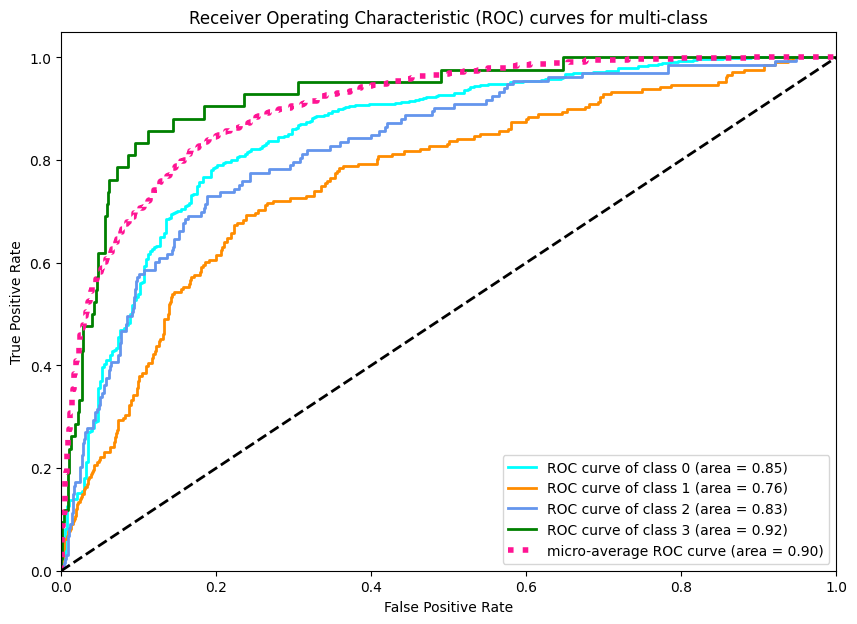

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Assuming your data is in X and y
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Binarize the output (necessary for ROC curve)
y_train_bin = label_binarize(y_train, classes=np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_train_bin.shape[1]

# Use a simple classifier for demonstration (Logistic Regression)
classifier = OneVsRestClassifier(LogisticRegression())

# Train the classifier
classifier.fit(X_train, y_train_bin)

# Get the scores for each class
y_score = classifier.decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure(figsize=(10, 7))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle=':', linewidth=4,
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curves for multi-class')
plt.legend(loc="lower right")
plt.show()


# confusion matrix

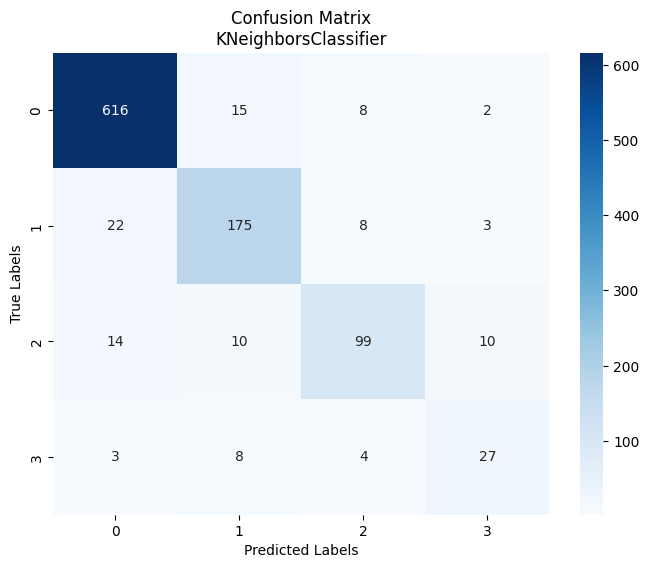

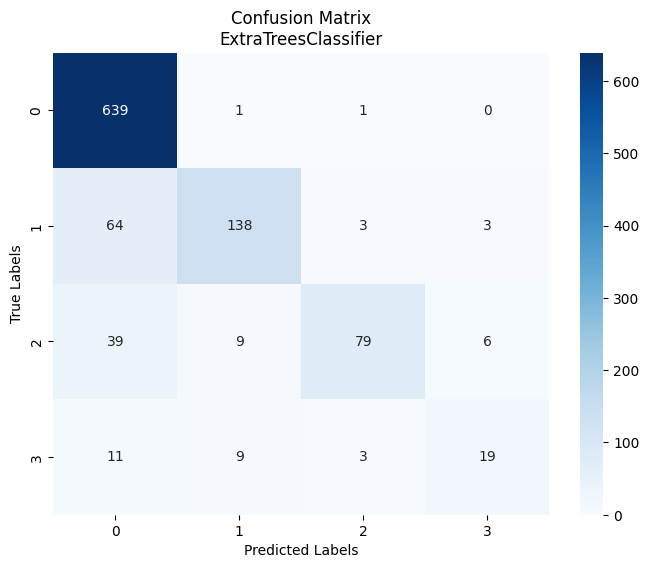

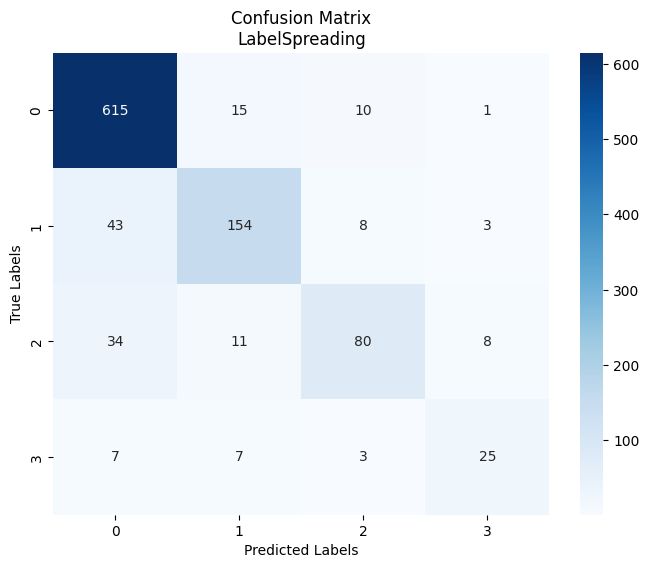

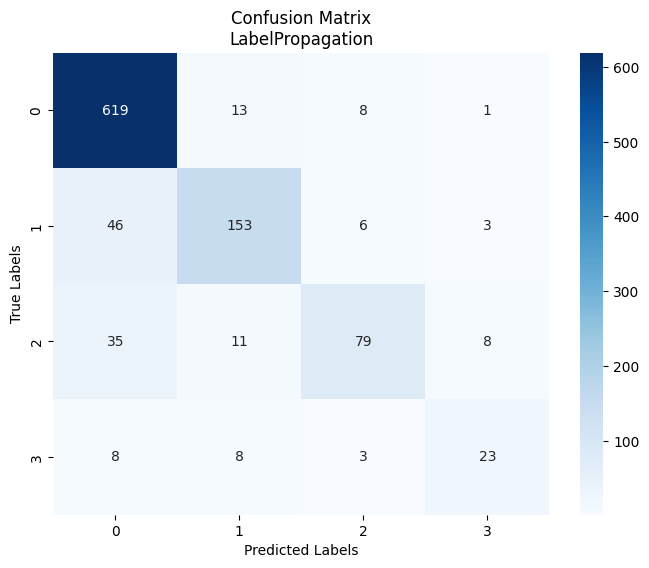

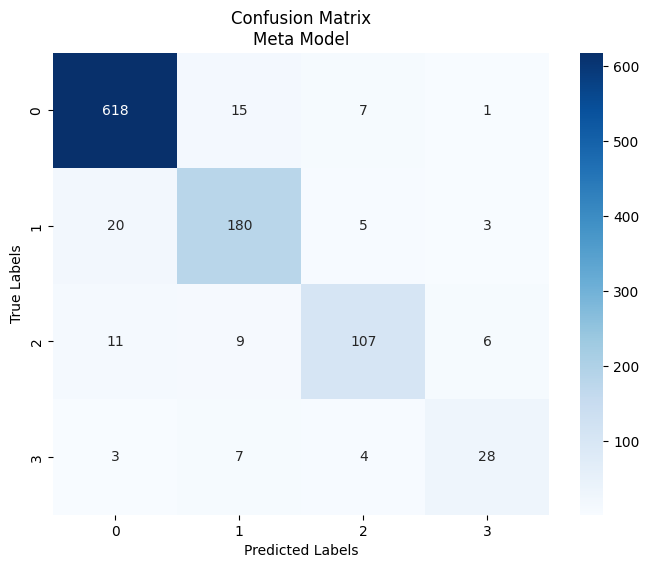

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# List of top models
top_models = ['KNeighborsClassifier', 'ExtraTreesClassifier', 'LabelSpreading', 'LabelPropagation']

# Create an empty array to hold predictions from the top models
top_model_predictions = np.zeros((X_test.shape[0], len(top_models)))

# Generate predictions from the top models
for idx, model_name in enumerate(top_models):
    model_instance = models[model_name]
    y_pred = model_instance.predict(X_test)
    top_model_predictions[:, idx] = y_pred
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, f'Confusion Matrix\n{model_name}')

# Use these predictions as the input features for the meta model
y_pred_meta = meta_model.predict(top_model_predictions)
cm_meta = confusion_matrix(y_test, y_pred_meta)
plot_confusion_matrix(cm_meta, 'Confusion Matrix\nMeta Model')


# classification report

In [32]:
# classificaiton_report for all models after hyperparameter tuning
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for models
model_params = {
    'LogisticRegression': {'C': 0.04153243132650617, 'solver': 'newton-cg', 'penalty': 'l2'},
    'KNeighborsClassifier': {'n_neighbors': 3, 'weights': 'distance', 'algorithm': 'auto', 'p': 1},
    'DecisionTreeClassifier': {'criterion': 'gini', 'splitter': 'random', 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': None},
    'SVC': {'C': 11.190145878235805, 'kernel': 'rbf', 'gamma': 'auto'},
    'RandomForestClassifier': {'n_estimators': 179, 'criterion': 'entropy', 'max_depth': 37, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': None},
    'GradientBoostingClassifier': {'n_estimators': 183, 'learning_rate': 0.3375091253496309, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 11, 'max_features': None},
    'MLPClassifier': {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.7254226805844118, 'learning_rate': 'invscaling', 'learning_rate_init': 0.0015049610004208825},
    'SGDClassifier': {'alpha': 0.00043934433202374957, 'penalty': 'l2'},
    'XGBClassifier': {'max_depth': 14, 'learning_rate': 0.2513283222974735, 'n_estimators': 276, 'gamma': 1.0779223875888779e-08, 'min_child_weight': 9, 'subsample': 0.9740536091089309, 'colsample_bytree': 0.5214397098648096, 'reg_alpha': 9.047124176535386e-06, 'reg_lambda': 2.1764454033811945e-07},
    'LGBMClassifier': {'max_depth': 13, 'learning_rate': 0.18219499171900058, 'n_estimators': 237, 'min_child_weight': 0.05053774832141578, 'subsample': 0.6391469090049364, 'colsample_bytree': 0.6493085070928252, 'reg_alpha': 1.2317462559984425e-05, 'reg_lambda': 1.3638694610969497e-05},
      'ExtraTreesClassifier': {'n_estimators': 146, 'max_depth': 47, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'criterion': 'gini'},
      'LabelSpreading': {'kernel': 'rbf', 'gamma': 0.3495362447449075},
      'LabelPropagation': {'kernel': 'rbf', 'gamma': 0.2969612893090621}
}

# Initialize models
models = {
    'LogisticRegression': LogisticRegression(**model_params['LogisticRegression']),
    'KNeighborsClassifier': KNeighborsClassifier(**model_params['KNeighborsClassifier']),
    'DecisionTreeClassifier': DecisionTreeClassifier(**model_params['DecisionTreeClassifier']),
    'SVC': SVC(**model_params['SVC']),
    'RandomForestClassifier': RandomForestClassifier(**model_params['RandomForestClassifier']),
    'GradientBoostingClassifier': GradientBoostingClassifier(**model_params['GradientBoostingClassifier']),
    'MLPClassifier': MLPClassifier(**model_params['MLPClassifier']),
    'SGDClassifier': SGDClassifier(**model_params['SGDClassifier']),
    'XGBClassifier': XGBClassifier(**model_params['XGBClassifier']),
    'LGBMClassifier': LGBMClassifier(**model_params['LGBMClassifier']),
    'ExtraTreesClassifier': ExtraTreesClassifier(**model_params['ExtraTreesClassifier']),
    'LabelSpreading': LabelSpreading(**model_params['LabelSpreading']),
    'LabelPropagation': LabelPropagation(**model_params['LabelPropagation'])
}

# Train models and evaluate their test accuracy
for model_name, model_instance in models.items():
    model_instance.fit(X_train, y_train)
    y_pred = model_instance.predict(X_test)
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

    


Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       641
           1       0.54      0.41      0.47       208
           2       0.55      0.35      0.43       133
           3       0.35      0.21      0.26        42

    accuracy                           0.71      1024
   macro avg       0.56      0.47      0.50      1024
weighted avg       0.68      0.71      0.69      1024

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.86      0.96      0.90       641
           1       0.76      0.69      0.72       208
           2       0.80      0.53      0.63       133
           3       0.57      0.48      0.52        42

    accuracy                           0.83      1024
   macro avg       0.75      0.66      0.70      1024
weighted avg       0.82      0.83      0.82      1024

Classification Report for DecisionTr

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Classification Report for MLPClassifier:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       641
           1       0.71      0.68      0.70       208
           2       0.72      0.59      0.65       133
           3       0.62      0.62      0.62        42

    accuracy                           0.82      1024
   macro avg       0.74      0.71      0.72      1024
weighted avg       0.82      0.82      0.82      1024

Classification Report for SGDClassifier:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       641
           1       0.51      0.38      0.43       208
           2       0.43      0.21      0.28       133
           3       0.41      0.36      0.38        42

    accuracy                           0.68      1024
   macro avg       0.53      0.46      0.48      1024
weighted avg       0.65      0.68      0.66      1024

Classification Report for XGBClassifier:
       

/opt/conda/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


Classification Report for LabelSpreading:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       641
           1       0.81      0.74      0.77       208
           2       0.80      0.64      0.71       133
           3       0.68      0.60      0.63        42

    accuracy                           0.86      1024
   macro avg       0.79      0.73      0.76      1024
weighted avg       0.85      0.86      0.85      1024

Classification Report for LabelPropagation:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       641
           1       0.81      0.74      0.78       208
           2       0.80      0.61      0.69       133
           3       0.67      0.57      0.62        42

    accuracy                           0.85      1024
   macro avg       0.79      0.72      0.75      1024
weighted avg       0.85      0.85      0.85      1024



# BEFORE AND AFTER TUNING

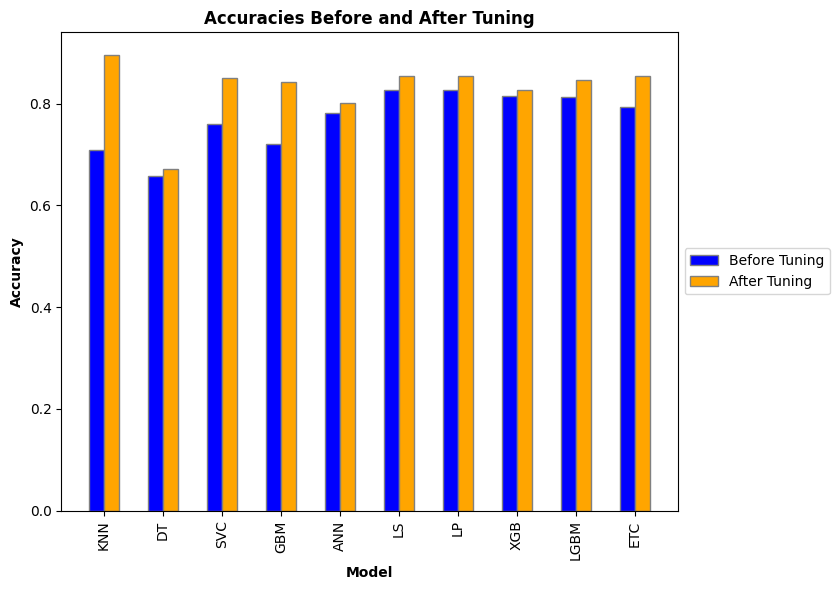

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ['KNN', 'DT', 'SVC', 'GBM', 'ANN', 'LS', 
          'LP', 'XGB', 'LGBM', 'ETC']

# Accuracy before hyperparameter tuning
accuracies_before = [0.708984375, 0.658203125, 0.7607421875, 
                     0.7216796875, 0.7822265625, 0.826171875, 0.826171875, 
                     0.8154296875, 0.8134765625, 0.7939453125]

# Accuracy after hyperparameter tuning
accuracies_after = [0.8955078125, 0.671875, 0.849609375,
                    0.841796875, 0.80078125, 0.853515625, 0.853515625, 
                    0.8271484375, 0.8466796875, 0.8544921875]

# Set the bar width
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# Plotting the bars
plt.figure(figsize=(10, 6))
plt.bar(r1, accuracies_before, color='blue', width=bar_width, edgecolor='grey', label='Before Tuning')
plt.bar(r2, accuracies_after, color='orange', width=bar_width, edgecolor='grey', label='After Tuning')

# Adding labels and title
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Accuracies Before and After Tuning', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(models))], models, rotation=90)

# Positioning the legend outside the plot on the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust layout to make space for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot
plt.show()


# Meta-Model Classification Report

In [5]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd

# Load the prepared data
data = pd.read_csv('/kaggle/input/hyperparameter-search-space/prepared_features1.csv')

# Separate features and labels
X = data.drop(columns=['disorder'])
y = data['disorder'] 

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for the selected models
model_params = {
    'KNeighborsClassifier': {'n_neighbors': 1, 'weights': 'distance', 'algorithm': 'kd_tree', 'p': 1},
    'ExtraTreesClassifier': {'n_estimators': 138, 'max_depth': 45, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': None, 'criterion': 'log_loss'},
    'LabelSpreading': {'kernel': 'rbf', 'gamma': 0.31541407208420913},
    'LabelPropagation': {'kernel': 'rbf', 'gamma': 0.2665510532364665}
}

# Initialize models
models = {
    'KNeighborsClassifier': KNeighborsClassifier(**model_params['KNeighborsClassifier']),
    'ExtraTreesClassifier': ExtraTreesClassifier(**model_params['ExtraTreesClassifier']),
    'LabelSpreading': LabelSpreading(**model_params['LabelSpreading']),
    'LabelPropagation': LabelPropagation(**model_params['LabelPropagation'])
}

# Train models and get predictions on test set
test_predictions = np.zeros((X_test.shape[0], len(models)))
for i, (model_name, model_instance) in enumerate(models.items()):
    model_instance.fit(X_train, y_train)
    test_predictions[:, i] = model_instance.predict(X_test)
    print(f"Test Accuracy for {model_name}: {accuracy_score(y_test, test_predictions[:, i])}")

# Train the meta-model (RandomForestClassifier)
meta_model = RandomForestClassifier(n_estimators=258, criterion='entropy', max_depth=14, min_samples_split=2, min_samples_leaf=3, max_features=None, random_state=42)
meta_model.fit(test_predictions, y_test)

# Make final predictions using the meta-model
final_predictions = meta_model.predict(test_predictions)

# Calculate final accuracy
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"\nFinal Meta-Model (RandomForestClassifier) Test Accuracy: {final_accuracy}")

# Generate and print classification report
report = classification_report(y_test, final_predictions)
print("\nClassification Report for the Meta-Model:")
print(report)


Test Accuracy for KNeighborsClassifier: 0.8955078125
Test Accuracy for ExtraTreesClassifier: 0.8525390625
Test Accuracy for LabelSpreading: 0.853515625
Test Accuracy for LabelPropagation: 0.853515625

Final Meta-Model (RandomForestClassifier) Test Accuracy: 0.90234375

Classification Report for the Meta-Model:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       641
           1       0.83      0.87      0.85       208
           2       0.85      0.78      0.82       133
           3       0.69      0.60      0.64        42

    accuracy                           0.90      1024
   macro avg       0.83      0.80      0.81      1024
weighted avg       0.90      0.90      0.90      1024

